# Import packages

In [1]:
import pandas as pd
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt

In [2]:
# Display all output in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Get data from Twitter API & Assess polarity score

In [3]:
#Setup Twitter API Authentication Variables to get tweets
consumer_key = 'RxH0MdZ9KelMW8aCdSJX7VLWp'
consumer_secret = 'ReGejlpQWMgM0lSMycvkNTeSqNqShTVYvfoovB2lhHahumDEbd'
access_token = '1127315289303945217-wJuzP9pLaghnX8pGQTiDeUodDeVQXO'
access_token_secret = 'UZMXTNjU5eJUfQC9ytx8ZvoPrtFfsSyjdVc5b8YJrJ4eT'

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [5]:
# Step 1: Sample tweets using api.seach
tweets = api.search('Machine Learning', lang='en', count=200) # maximum tweets using api.search are 100 only

data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

display(data.head(10))

,Tweets
0,RT @anorangeduck: Results from our new paper o...
1,Newsroom | HIV : Researchers at Wits will als...
2,Forbes: Google Just Made #MachineLearning More...
3,Harnessing big data and machine learning to fo...
4,Grading some machine learning homework. Assign...
5,RT @sinzlab: We are looking for a motivated an...
6,RT @Overlooked_Inc: U.S.-China tensions weigh ...
7,RT @Overlooked_Inc: U.S. stocks bounce back; d...
8,RT @Overlooked_Inc: Sixteen U.S. Marines arres...
9,RT @Overlooked_Inc: British Airways to resume ...


In [6]:
# Step 2: Create Twitter stream to get more than 100 tweets
df = pd.DataFrame(columns = ['Tweets', 'User', 'User_statuses_count', 
                             'user_followers', 'User_location', 'User_verified',
                             'fav_count', 'rt_count', 'tweet_date'])

def stream(data, file_name):
    i = 0
    for tweet in tweepy.Cursor(api.search, q=data, count=100, lang='en').items():
        print(i, end='\r')
        df.loc[i, 'Tweets'] = tweet.text
        df.loc[i, 'User'] = tweet.user.name
        df.loc[i, 'User_statuses_count'] = tweet.user.statuses_count
        df.loc[i, 'user_followers'] = tweet.user.followers_count
        df.loc[i, 'User_location'] = tweet.user.location
        df.loc[i, 'User_verified'] = tweet.user.verified
        df.loc[i, 'fav_count'] = tweet.favorite_count
        df.loc[i, 'rt_count'] = tweet.retweet_count
        df.loc[i, 'tweet_date'] = tweet.created_at
        df.to_excel('{}.xlsx'.format(file_name))
        i+=1
        if i == 1000:
            break
        else:
            pass

stream(data = ['Machine Learning'], file_name = 'my_tweets')
df.info()

In [11]:
data = pd.DataFrame(df['Tweets'])
data.head()

,Tweets
0,RT @anorangeduck: Results from our new paper o...
1,RT @anorangeduck: Results from our new paper o...
2,Newsroom | HIV : Researchers at Wits will als...
3,Forbes: Google Just Made #MachineLearning More...
4,Harnessing big data and machine learning to fo...


In [12]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\BRIAN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
sid = SentimentIntensityAnalyzer()


listy = []

for index, row in data.iterrows():
  ss = sid.polarity_scores(row["Tweets"])
  listy.append(ss)
  
se = pd.Series(listy)
data['polarity'] = se.values

display(data.head(100))

,Tweets,polarity
0,RT @anorangeduck: Results from our new paper o...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,RT @anorangeduck: Results from our new paper o...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,Newsroom | HIV : Researchers at Wits will als...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,Forbes: Google Just Made #MachineLearning More...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Harnessing big data and machine learning to fo...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,Grading some machine learning homework. Assign...,"{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'comp..."
6,RT @sinzlab: We are looking for a motivated an...,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp..."
7,RT @Overlooked_Inc: U.S.-China tensions weigh ...,"{'neg': 0.137, 'neu': 0.863, 'pos': 0.0, 'comp..."
8,RT @Overlooked_Inc: U.S. stocks bounce back; d...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,RT @Overlooked_Inc: Sixteen U.S. Marines arres...,"{'neg': 0.263, 'neu': 0.737, 'pos': 0.0, 'comp..."


# Data Analysis

## Graphical analysis

In [14]:
# Create 4 new columns from data['polarity'] column

data['negative'] = pd.Series([x['neg'] for x in data.polarity])
data['neutral'] = pd.Series([x['neu'] for x in data.polarity])
data['positive'] = pd.Series([x['pos'] for x in data.polarity])
data['compound'] = pd.Series([x['compound'] for x in data.polarity])

In [15]:
data.head()

,Tweets,polarity,negative,neutral,positive,compound
0,RT @anorangeduck: Results from our new paper o...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0
1,RT @anorangeduck: Results from our new paper o...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0
2,Newsroom | HIV : Researchers at Wits will als...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0
3,Forbes: Google Just Made #MachineLearning More...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0
4,Harnessing big data and machine learning to fo...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0


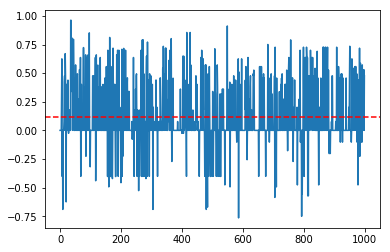

In [17]:
plt.plot(data['compound']) # plot compound score for each tweets
plt.axhline(y=data['compound'].mean(), linestyle='--', color='red') # plot average compound score

## Create a wordcloud of most frequented words

In [18]:
# Convert tweets to one string
# Remove unnecessory word - stopword, punctuation

In [19]:
# Import wordcloud
from wordcloud import WordCloud, STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

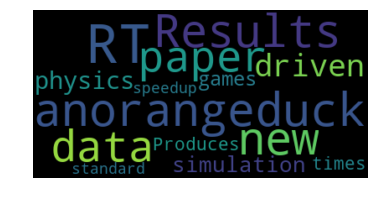

In [20]:
# Step 1: Quick template

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(data['Tweets'][1])

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

C:\Users\BRIAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
C:\Users\BRIAN\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:721: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"
C:\Users\BRIAN\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:721: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


(-0.5, 999.5, 807.5, -0.5)

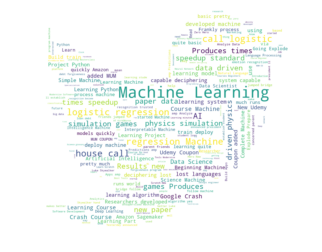

In [21]:
# Step 2: Enhance!

# Import the mask so wordcloud will have a twitter bird shape:
from scipy.misc import imread
twitter_mask = imread('twitter_mask.png', flatten=True)

# Join the whole tweets columns into one single string:
words = ' '.join(data['Tweets'])

# Remove URLs, RT, hashtag and twitter handles
word_cleaned = " ".join([word for word in words.split()
                  if 'http' not in word
                  and 'https' not in word
                  and not word.startswith('@')
                  and not word.startswith('#')
                  and word != 'RT'])

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS, # remove stopwords
                      background_color='white',
                      width=1800,
                      height=1400,
                      mask=twitter_mask # use twitter image as mask
                     ).generate(word_cleaned)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()